In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import log
from math import pi

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving IBOV_201602010800_201901091137.csv to IBOV_201602010800_201901091137.csv


#Fluctuation Relation for Trading Volume in Brazilian Index IBOV

We shall investigate some properties of fluctuation relations when applied to trading volumes in the brazilian stock market. 

##Fluctuation Relation (overview)

The concept of a fluctuation relation arises in physics in the context of measuring equilibrium or deviation from it.

The second law of thermodynamics asserts that, in average, entropy must be produced ($\Delta S > 0$) by natural processes. 

Nevertheless, in certain conditions, one may observe the consumption of entropy ($\Delta S < 0$) in a microscopic framework (that ignores the big picture), in out of equilibrium systems or in turbulent regimes.

To understand the proportion with which $\Delta S$ is positive or negative it is common to use the fluctuation theorem (https://en.wikipedia.org/wiki/Fluctuation_theorem), which states the second law in a more precise manner:

$\frac{P(\Sigma_t = \Delta S)}{P(\Sigma_t =  - \Delta S)} = exp(t \Delta S )$

This result is valuable, since it turns out to be valid even far from equilibrium.

The idea of the following work is to investigate the validity of analogous relations in the Brazilian Stock Market, starting by trade volumes.

We shall investigate data retrieved from brazilian Bovespa stock market (http://www.b3.com.br/pt_br/)


##Loading MT5 data

In the cell below we load data between February 2016 and January 2019, obtained using metatrader 5.

In [ ]:

df = pd.read_csv("IBOV_201602010800_201901091137.csv",sep="\t",encoding='utf8')

df0 = df[~ df['<LAST>'].isna()]

df1 = df0.drop(['<BID>','<ASK>'], axis=1)

df2 = df1.reset_index()

df3 = df2.drop(['index'], axis=1)

df3 = df3[ df3['<LAST>']!=0]

In [ ]:
df3.head()

,<DATE>,<TIME>,<LAST>,<VOLUME>,tempofiltrado
1,2016.02.01,10:01:00.000,40397.0,16840949.0,10:01
2,2016.02.01,10:01:30.000,40381.0,256019.0,10:01
3,2016.02.01,10:02:00.000,40384.0,390807.0,10:02
4,2016.02.01,10:02:30.000,40361.0,316598.0,10:02
5,2016.02.01,10:03:00.000,40360.0,3651113.0,10:03


The function below makes sure we ignore trades that occur beyond 18:28 PM, since there are few instances of such trades which results in insufficient statistics (note that auction takes place between  18:00-18:27 PM)

In [ ]:
def filtratempo(df3):
    tempofiltrado=[]
    for i in df3.index:
        tempofiltrado.append(df3['<TIME>'][i][:-7])
    df3['tempofiltrado'] = tempofiltrado
    return df3

df3=filtratempo(df3);

In [ ]:
indices=[]

for i in df3.index:
    if(int(df3['tempofiltrado'][i][0]+df3['tempofiltrado'][i][1]+df3['tempofiltrado'][i][3]+df3['tempofiltrado'][i][4])>1826):
        indices.append(i)

In [ ]:
for i in indices:
    df3=df3.drop(i)

#'18:27', '18:28', '18:31', '18:32',
#       '18:33', '18:34', '18:37', '18:50'

##list of all trade times

In [ ]:
np.unique(df3['tempofiltrado'])[0:]

array(['10:00', '10:01', '10:02', '10:03', '10:04', '10:05', '10:06',
       '10:07', '10:08', '10:09', '10:10', '10:11', '10:12', '10:13',
       '10:14', '10:15', '10:16', '10:17', '10:18', '10:19', '10:20',
       '10:21', '10:22', '10:23', '10:24', '10:25', '10:26', '10:27',
       '10:28', '10:29', '10:30', '10:31', '10:32', '10:33', '10:34',
       '10:35', '10:36', '10:37', '10:38', '10:39', '10:40', '10:41',
       '10:42', '10:43', '10:44', '10:45', '10:46', '10:47', '10:48',
       '10:49', '10:50', '10:51', '10:52', '10:53', '10:54', '10:55',
       '10:56', '10:57', '10:58', '10:59', '11:00', '11:01', '11:02',
       '11:03', '11:04', '11:05', '11:06', '11:07', '11:08', '11:09',
       '11:10', '11:11', '11:12', '11:13', '11:14', '11:15', '11:16',
       '11:17', '11:18', '11:19', '11:20', '11:21', '11:22', '11:23',
       '11:24', '11:25', '11:26', '11:27', '11:28', '11:29', '11:30',
       '11:31', '11:32', '11:33', '11:34', '11:35', '11:36', '11:37',
       '11:38', '11:

In [ ]:
len(desvios)

515

#Filtering Intraday Volatility

We are interested in a normalizing the price by dividing each price value by the correspondent volatility (standard deviation) associated with the time when the trade takes place, so called intraday volatility, following the approach presented in [1]

In [ ]:
desvio = np.std(df3[df3['tempofiltrado']=='10:01:00']['<LAST>'])
precofiltrado = df3['<LAST>'][df3['tempofiltrado']=='10:01:00']/desvio
type(precofiltrado)

pandas.core.series.Series

In [ ]:
def volatilidadesdiarias(df3):

    desvios = []
    final= np.empty(0)
    desvio = np.std(df3[df3['tempofiltrado']=='10:00']['<LAST>'])
    precofiltrado = df3['<LAST>'][df3['tempofiltrado']=='10:00']/desvio
    desvios.append(desvio)

    for i in np.unique(df3['tempofiltrado'])[1:]:
        desvio = np.std(df3[df3['tempofiltrado']==i]['<LAST>'])
        desvios.append(desvio)
        precofiltrado = pd.concat([precofiltrado,df3['<LAST>'][df3['tempofiltrado']==i]/desvio])
    
    precofiltrado = precofiltrado.sort_index()

    return precofiltrado, desvios

In [ ]:
final, desvios = volatilidadesdiarias(df3)

In [ ]:
np.unique(df3['tempofiltrado'])[2::10]

array(['10:02', '10:12', '10:22', '10:32', '10:42', '10:52', '11:02',
       '11:12', '11:22', '11:32', '11:42', '11:52', '12:02', '12:12',
       '12:22', '12:32', '12:42', '12:52', '13:02', '13:12', '13:22',
       '13:32', '13:42', '13:52', '14:02', '14:12', '14:22', '14:32',
       '14:42', '14:52', '15:02', '15:12', '15:22', '15:32', '15:42',
       '15:52', '16:02', '16:12', '16:22', '16:32', '16:42', '16:52',
       '17:02', '17:12', '17:22', '17:32', '17:42', '17:52', '18:02',
       '18:12', '18:22', '18:34'], dtype=object)

Notice the following regions in the plot below:


*  10:00 to 17:00 - daytime trading
* 17:00 to 18:00 - market approaches closing time, volatility spikes
*   18:00 to 18:30 -  the auction, where volatility takes many different values, reaching its maximum around 18:22

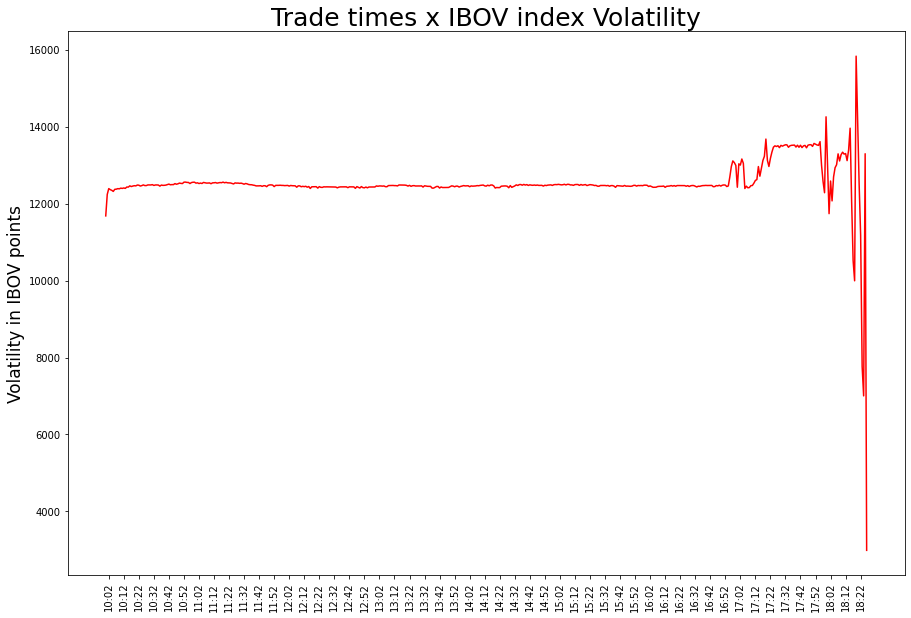

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(np.unique(df3['tempofiltrado']),desvios, color= 'Red')
plt.xticks(np.unique(df3['tempofiltrado'])[2::10],rotation=90,fontsize=10)
plt.ylabel('Volatility in IBOV points', fontsize = 17)
plt.title('Trade times x IBOV index Volatility', fontsize = 25)
plt.show()

##Finding index values for price spikes and falls 

In [ ]:
def encontraindices(df3):
    indicesmais = []
    indicesmenos = []
    for i in range(0,len(df3.index)-4):
        if(df3['<LAST>'][df3.index[i+1]]>df3['<LAST>'][df3.index[i]]):
            indicesmais.append(i+1)
        elif(df3['<LAST>'][df3.index[i+1]]<df3['<LAST>'][df3.index[i]]):
            indicesmenos.append(i+1)
    return indicesmais, indicesmenos

indicesmais, indicesmenos = encontraindices(df3)

##Finding trade volumes for price spikes and falls 

In [ ]:
def volumes(df3, indicesmais, indicesmenos):
    volumesmais = []
    volumesmenos = []
    for i in indicesmais:
        volumesmais.append(df3['<VOLUME>'][df3.index[i]])
    for i in indicesmenos:
        volumesmenos.append(df3['<VOLUME>'][df3.index[i]])
    return volumesmais, volumesmenos

volumesmais, volumesmenos = volumes(df3, indicesmais, indicesmenos)

##Finding price variation for price spikes and falls 

In [ ]:
def variacoes(df3, indicesmais, indicesmenos):
    variacoesmais = []
    variacoesmenos = []
    for i in indicesmais:
        #print(i)
        variacoesmais.append(df3['<LAST>'][df3.index[i]]-df3['<LAST>'][df3.index[i-1]])
    for i in indicesmenos:
        variacoesmenos.append(df3['<LAST>'][df3.index[i]]-df3['<LAST>'][df3.index[i-1]])
    return variacoesmais, variacoesmenos

variacoesmais, variacoesmenos = variacoes(df3,indicesmais, indicesmenos)

In [ ]:
#def flutuacaoV(volumesmais,volumesmenos):
#histogramamais = np.histogram(volumesmais)
#histogramamenos = np.histogram(volumesmenos)



In [ ]:
#def flutuacaoV(volumesmais,volumesmenos):
histogramamais = np.histogram(volumesmais, bins = np.logspace(np.log10(100000),np.log10(10000000)) )
histogramamenos = np.histogram(volumesmenos , np.logspace(np.log10(100000),    np.log10(10000000)))



In [ ]:
histogramamais

(array([    8,     6,     9,    12,     8,    29,    66,   114,   210,
          442,  1138,  2827,  6272, 12331, 20898, 28792, 36133, 39732,
        38719, 33653, 26384, 18689, 11822,  7015,  3760,  1996,  1240,
          751,   507,   554,   326,   246,   213,   126,   129,    84,
          128,    54,    62,   112,    37,    30,    46,    31,    11,
           17,    26,    11,    13]),
 array([1.00000000e+04, 1.26485522e+04, 1.59985872e+04, 2.02358965e+04,
        2.55954792e+04, 3.23745754e+04, 4.09491506e+04, 5.17947468e+04,
        6.55128557e+04, 8.28642773e+04, 1.04811313e+05, 1.32571137e+05,
        1.67683294e+05, 2.12095089e+05, 2.68269580e+05, 3.39322177e+05,
        4.29193426e+05, 5.42867544e+05, 6.86648845e+05, 8.68511374e+05,
        1.09854114e+06, 1.38949549e+06, 1.75751062e+06, 2.22299648e+06,
        2.81176870e+06, 3.55648031e+06, 4.49843267e+06, 5.68986603e+06,
        7.19685673e+06, 9.10298178e+06, 1.15139540e+07, 1.45634848e+07,
        1.84206997e+07, 2.32995

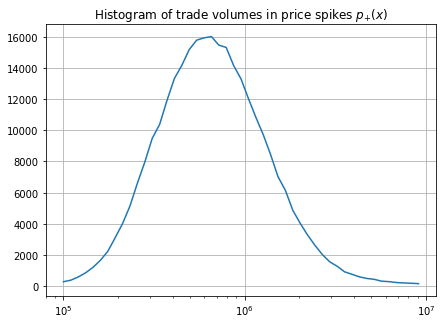

In [ ]:

plt.figure(figsize=(7,5))
plt.plot(histogramamais[1][0:(len(histogramamais[1])-1)],histogramamais[0])
plt.grid(True)
plt.semilogx()
#plt.title("histograma de volumes onde há crescimento de preço $p_{+}(x)$")
plt.title("Histogram of trade volumes in price spikes $p_{+}(x)$")
plt.show()

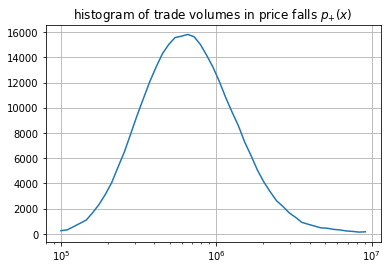

In [ ]:
plt.plot(histogramamenos[1][0:(len(histogramamenos[1])-1)],histogramamenos[0])
plt.grid(True)
plt.semilogx()
#plt.title("histograma de volumes onde há queda de preço $p_{-}(x)$")
plt.title("histogram of trade volumes in price falls $p_{+}(x)$")
plt.show()

In [ ]:
(histogramamais[0]/histogramamenos[0])

array([1.14229249, 1.21183801, 1.03478261, 1.0323741 , 1.10857664,
       0.99224806, 0.96304254, 0.99776   , 0.9918619 , 0.97485347,
       1.01895808, 1.00517611, 1.01120239, 0.96753731, 0.98863259,
       1.0080224 , 0.99152424, 1.00992275, 1.01330078, 1.01556718,
       1.01207943, 0.98867707, 1.01931531, 1.00049491, 1.00704706,
       0.99776157, 1.00389033, 1.00808709, 0.98597967, 0.96761747,
       0.9933732 , 0.96453339, 0.98080194, 0.98204668, 0.99657665,
       0.92988084, 0.93645084, 0.97713415, 1.00983607, 1.00656168,
       0.96935484, 1.04384134, 0.98886414, 0.90502793, 0.93650794,
       1.02155172, 1.07106599, 1.36428571, 1.01219512])

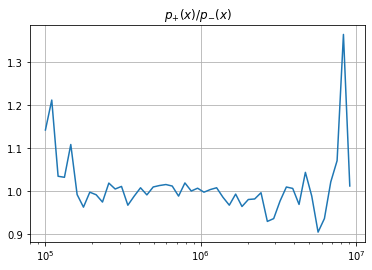

In [ ]:

plt.plot(histogramamenos[1][0:(len(histogramamenos[1])-1)],(histogramamais[0]/histogramamenos[0]))
plt.grid(True)
plt.semilogx()
plt.title("$p_{+}(x)/p_{-}(x)$")
plt.show()

[]

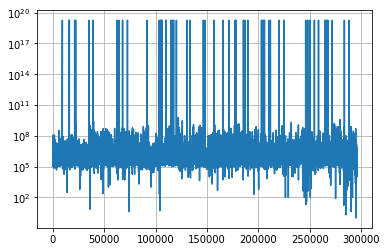

In [ ]:
plt.plot(volumesmais)
plt.grid(True)
plt.semilogy()

[]

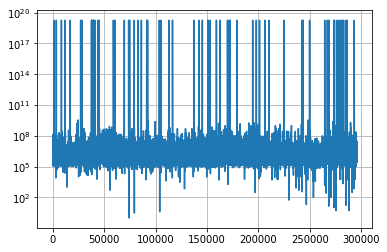

In [ ]:
plt.plot(volumesmenos)
plt.grid(True)
plt.semilogy()

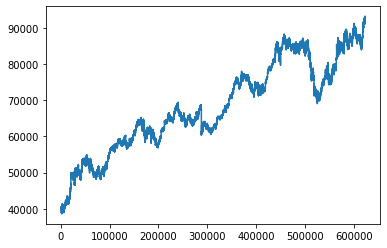

In [ ]:
plt.plot(df3['<LAST>'])

In [ ]:
df3.head()

,<DATE>,<TIME>,<LAST>,<VOLUME>,tempofiltrado
1,2016.02.01,10:01:00.000,40397.0,16840949.0,10:01
2,2016.02.01,10:01:30.000,40381.0,256019.0,10:01
3,2016.02.01,10:02:00.000,40384.0,390807.0,10:02
4,2016.02.01,10:02:30.000,40361.0,316598.0,10:02
5,2016.02.01,10:03:00.000,40360.0,3651113.0,10:03


In [ ]:
listinmais=[]
for i in range(0,len(volumesmais)):
    if volumesmais[i]> 1.66020697e+19:
        listinmais.append(i) 

listin

In [ ]:
volumesmais[listinmais[5]]

1.8446744073707807e+19

In [ ]:
listinmenos=[]
for i in range(0,len(volumesmenos)):
    if volumesmenos[i]> 1.66020697e+19:
        listinmenos.append(i) 

In [ ]:
volumesmenos[listinmenos[6]]

1.844674407370869e+19

In [ ]:
#bins=np.logspace(np.log10(0.1),np.log10(1.0))
np.logspace(np.log10(0.1),np.log10(10000000000000000000))

array([1.00000000e-01, 2.55954792e-01, 6.55128557e-01, 1.67683294e+00,
       4.29193426e+00, 1.09854114e+01, 2.81176870e+01, 7.19685673e+01,
       1.84206997e+02, 4.71486636e+02, 1.20679264e+03, 3.08884360e+03,
       7.90604321e+03, 2.02358965e+04, 5.17947468e+04, 1.32571137e+05,
       3.39322177e+05, 8.68511374e+05, 2.22299648e+06, 5.68986603e+06,
       1.45634848e+07, 3.72759372e+07, 9.54095476e+07, 2.44205309e+08,
       6.25055193e+08, 1.59985872e+09, 4.09491506e+09, 1.04811313e+10,
       2.68269580e+10, 6.86648845e+10, 1.75751062e+11, 4.49843267e+11,
       1.15139540e+12, 2.94705170e+12, 7.54312006e+12, 1.93069773e+13,
       4.94171336e+13, 1.26485522e+14, 3.23745754e+14, 8.28642773e+14,
       2.12095089e+15, 5.42867544e+15, 1.38949549e+16, 3.55648031e+16,
       9.10298178e+16, 2.32995181e+17, 5.96362332e+17, 1.52641797e+18,
       3.90693994e+18, 1.00000000e+19])

In [ ]:
df3[34131:34132]

,<DATE>,<TIME>,<LAST>,<VOLUME>,tempofiltrado
34186,2016.03.28,11:44:30.000,50344.0,1.844674e+19,11:44


In [ ]:
df3[34552:34553]

,<DATE>,<TIME>,<LAST>,<VOLUME>,tempofiltrado
34607,2016.03.28,15:15:00.000,50966.0,1.844674e+19,15:15


In [ ]:
indicesmais[16171]

34552